#Dependencies

In [ ]:
!pip install tensorflow
!pip install shap

     |████████████████████████████████| 462 kB 7.4 MB/s 
     |████████████████████████████████| 564 kB 5.5 MB/s 


In [ ]:
from google.colab import drive
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from tensorflow.keras import models, layers, utils, backend as K
import shap

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
!pip install xport

In [ ]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


#PFAS dataframe

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [ ]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [ ]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [ ]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81,
 'LBDVTPLC': 0.03,
 'LBDVVBLC': 0.0,
 'LBDVXYLC': 63.52,
 

In [ ]:
len(d_p)

131

In [ ]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [ ]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [ ]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 25 or val >= 75)}

In [ ]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [ ]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [ ]:
len(binary_list)

17

In [ ]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,LBDBSELC,LBDBMNLC,LBDFORLC,URDDEELC,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

In [ ]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [ ]:
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
print(len(intersection_list))

0


In [ ]:
intersection_list

[]

In [ ]:
#percentage of what is binary in df
len(intersection_list)/len(df_PFAS)*100

0.0

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

0

In [ ]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_PFAS=df_PFAS.drop(columns=cols_to_drop)

#taking log of continuous values

In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = df_PFAS.columns[df_PFAS.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in df_PFAS.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    df_PFAS[col] = np.log(df_PFAS[col])

In [ ]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,-1.609438,0.0,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.302585,0.0,-2.659260,1.0
1,73571.0,-1.203973,0.0,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,0.262364,0.0,-2.659260,1.0,-2.659260,1.0
2,73574.0,-2.302585,0.0,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.356675,0.0,-2.659260,1.0,-2.659260,1.0
3,73576.0,-1.609438,0.0,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,-0.510826,0.0,-2.659260,1.0,-2.302585,0.0
4,73577.0,-2.302585,0.0,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.916291,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,-2.659260,1.0,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-1.203973,0.0,-2.659260,1.0,-2.659260,1.0
2334,83712.0,-1.609438,0.0,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
2335,83713.0,-0.105361,0.0,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,0.405465,0.0,-0.693147,0.0,-1.203973,0.0
2336,83717.0,-1.609438,0.0,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.223144,0.0,-2.659260,1.0,-2.659260,1.0


#Splitting the data
We are trying to predict detection level of Perfluorodecanoic acid (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBXPFDE']
Y_test=test['LBXPFDE']

In [ ]:
include=list(X_train.columns)

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)

Lasso(alpha=1)

In [ ]:
print('R squared training set', reg.score(X_train_scaled, Y_train)*100)
print('R squared test set', reg.score(X_test_scaled, Y_test)*100)

R squared training set 0.0
R squared test set -0.008662718450835882


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.6916936952811006
MSE test set 0.6991832357947547


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.8316812462001897
RMSE test set 0.8361717740959418


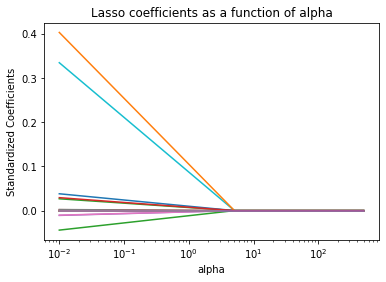

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
model.alpha_


0.0017120112248281021

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.0017120112248281021)

In [ ]:
Lasso(alpha=0.008585019798920172)

Lasso(alpha=0.008585019798920172)

In [ ]:
print(list(zip(lasso_best.coef_, X_train_scaled)))

[(-0.005027922911761327, array([-0.49646684,  1.2894464 , -0.10802135, -0.68412292,  0.9000116 ,
       -0.07829735,  0.09021937, -0.30398759,  0.37521923,  0.23795629,
       -0.11072125, -0.66270522,  0.87920767, -0.39874533,  0.46107203])), (-0.009704645876586093, array([ 0.21804154, -2.73894591, -0.10802135,  1.19856507, -1.11109679,
       -0.07829735,  0.09021937, -0.30398759,  0.37521923, -0.17261642,
       -0.11072125, -0.20977306, -1.13738771, -0.39874533,  0.46107203])), (0.030976191369573244, array([ 1.35714703, -1.25417047, -0.10802135, -0.68412292,  0.9000116 ,
       -0.07829735,  0.09021937, -0.30398759,  0.37521923, -1.16185886,
       -0.11072125, -0.66270522,  0.87920767, -0.39874533,  0.46107203])), (0.004096792953255688, array([-1.03588363,  0.97299268, -0.10802135, -0.68412292,  0.9000116 ,
       -0.07829735,  0.09021937, -0.30398759,  0.37521923,  0.55642122,
       -0.11072125, -0.66270522,  0.87920767, -0.39874533,  0.46107203])), (-0.017922600283599037, array

In [ ]:
reg = Lasso(alpha=0.008585019798920172)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [ ]:
y_pred

array([-2.36281928, -1.22199649, -1.94905055, -0.48021978, -1.37372539,
       -0.81511141, -2.20498486, -0.50014645, -0.25300692, -1.95465141,
       -1.8178466 , -1.37493307,  0.26362738, -2.13309519, -2.1036895 ,
        0.65181348, -2.10463467, -1.3385259 , -1.96195824, -2.206317  ,
       -1.95164098, -2.09893572, -1.21471473, -0.45946677, -2.05110311,
       -1.12808269, -1.14481391, -2.10235737, -2.20330657, -2.05110311,
       -1.42426483, -1.4678998 , -0.12392841, -1.71029265, -1.77233421,
       -2.02077251, -1.21707147, -1.96195824, -1.40294616, -1.63610334,
       -1.48772136, -2.54516155, -2.1082441 , -1.83220236, -1.59506037,
       -1.5972737 , -2.04382135, -1.15521108, -2.23344538, -2.36281928,
       -2.41882007, -1.64293524, -2.2085943 , -1.77233421, -0.59856415,
       -1.14506046, -1.9817798 , -2.22991297, -2.02397473, -1.77961597,
       -0.99227239, -1.26809274, -1.26901766, -2.23344538, -1.77961597,
       -1.33362284, -0.42908769, -2.02077251, -2.05110311, -2.36

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set -1.1714896077978958
R squared test set 0.7204751891610376
MSE training set 1.5020056710822343
MSE test set 0.1954221328581424
RMSE training set 1.2255634096537944
RMSE test set 0.4420657562604713


X has feature names, but Lasso was fitted without feature names
X has feature names, but Lasso was fitted without feature names
X has feature names, but Lasso was fitted without feature names


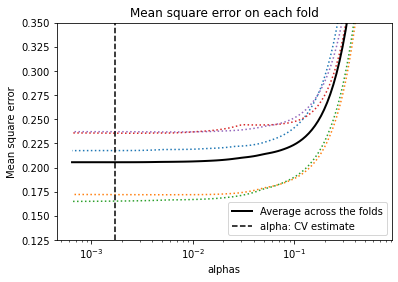

In [ ]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.125, 0.35
plt.ylim(ymin, ymax);

In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1594,-2.659260,-2.362819
1598,-2.659260,-2.233445
717,-2.659260,-2.649326
543,-2.659260,-2.208594
948,-2.659260,-2.233445
...,...,...
746,0.741937,0.263627
564,0.875469,-0.072892
941,0.916291,-0.117372
1074,1.098612,-1.568878


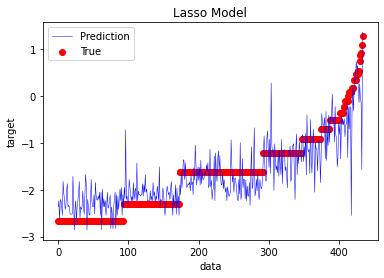

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso Model")
plt.legend()
plt.show()

#Decision Tree Regression

[Python | Decision Tree Regression using sklearn](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

to be able to plot the results we need to make sure the results are on the same index so they match up

In [ ]:
list(X_test.index)==list(Y_test.index)

True

In [ ]:
y_pred_series=pd.Series(y_pred,index=X_test.index)
list(y_pred_series.index)==list(Y_test.index)

True

In [ ]:
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

,Actual,Prediction
1594,-2.659260,-2.659260
1598,-2.659260,-2.659260
717,-2.659260,-2.659260
543,-2.659260,-2.302585
948,-2.659260,-2.659260
...,...,...
746,0.741937,-0.223144
564,0.875469,-0.223144
941,0.916291,-0.223144
1074,1.098612,-2.302585


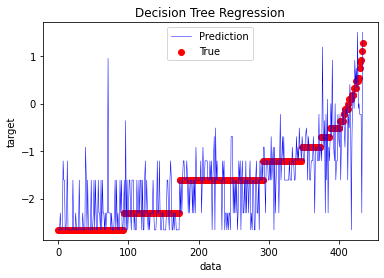

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 1.0
R squared test set 0.4601922766559917
MSE training set 1.286618943240008e-33
MSE test set 0.3773918183239856
RMSE training set 3.5869470908280876e-17
RMSE test set 0.6143222430646522


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
reg = RandomForestRegressor(random_state = 0)
 
#fit the regressor with x and y data
reg.fit(X_train, Y_train) 
y_pred = reg.predict(X_test)

In [ ]:
print('R squared training set', reg.score(X_train, Y_train)*100)
print('R squared test set', reg.score(X_test, Y_test)*100)

R squared training set 95.14150474057072
R squared test set 71.37357228665834


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.03360590539500346
MSE test set 0.20013384654693736


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.18331913537599795
RMSE test set 0.4473632154602537


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1594,-2.659260,-2.387281
1598,-2.659260,-2.396735
717,-2.659260,-2.648560
543,-2.659260,-2.405282
948,-2.659260,-2.437383
...,...,...
746,0.741937,0.558870
564,0.875469,0.135935
941,0.916291,0.005698
1074,1.098612,-1.230901


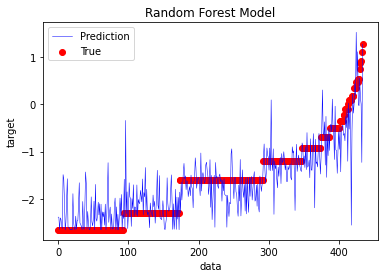

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

repeat process with most important features [Random Forest in Python
](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: LBXPFUA              Importance: 0.4
Variable: LBDPFUAL             Importance: 0.2
Variable: LBXPFNA              Importance: 0.18
Variable: SEQN                 Importance: 0.11
Variable: LBXPFHS              Importance: 0.06
Variable: LBXMPAH              Importance: 0.02
Variable: LBDMPAHL             Importance: 0.01
Variable: LBXPFHP              Importance: 0.01
Variable: LBXPFDO              Importance: 0.01
Variable: LBDPFHSL             Importance: 0.0
Variable: LBXPFBS              Importance: 0.0
Variable: LBDPFBSL             Importance: 0.0
Variable: LBDPFHPL             Importance: 0.0
Variable: LBDPFNAL             Importance: 0.0
Variable: LBDPFDOL             Importance: 0.0


In [ ]:
#make a list with everying above 0 importance in order of highest to lowest
include=[]
for i,j in feature_importances:
  if j >0:
    include.append(i)
print(include)

['LBXPFUA', 'LBDPFUAL', 'LBXPFNA', 'SEQN', 'LBXPFHS', 'LBXMPAH', 'LBDMPAHL', 'LBXPFHP', 'LBXPFDO']


In [ ]:
reg_important = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg_important.fit(X_train[include], Y_train) 
y_pred = reg_important.predict(X_test[include])

In [ ]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))

R squared training set 0.9514150474057073
R squared test set 0.7149277839380043


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg_important.predict(X_train[include])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg_important.predict(X_test[include])
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', mse_test)

MSE training set 0.033551674728213514
MSE test set 0.1993004496245854


In [ ]:
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, pred))
print('RMSE test set', rmse_test)

RMSE training set 0.1831711623815646
RMSE test set 0.4464307892883122


In [ ]:
pred_dict={}
R_train_dict={}
R_test_dict={}
mse_train_dict={}
mse_test_dict={}
rmse_train_dict={}
rmse_test_dict={}
#making a loop to go through adding one at a time and evaulating
for i in range(1,len(include)+1):
  #used is a list of what will be included
  used=include[:i]
  #fit the regression
  rf = RandomForestRegressor(random_state = 0)
  rf.fit(X_train[used], Y_train)
  y_pred = rf.predict(X_test[used])
  pred_dict[i]=y_pred
  pred_train = rf.predict(X_train[used])
  #R squared test
  R_train=metrics.r2_score(Y_train,pred_train)
  R_train_dict[i]=R_train
  R_test=metrics.r2_score(Y_test,y_pred)
  R_test_dict[i]=R_test
  #MSE
  mse_train = mean_squared_error(Y_train, pred_train)
  mse_train_dict[i]=mse_train
  mse_test = mean_squared_error(Y_test, y_pred)
  mse_test_dict[i]=mse_test
  #RMSE
  rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
  rmse_train_dict[i]=rmse_train
  rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
  rmse_test_dict[i]=rmse_test

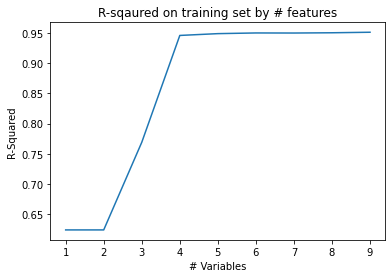

In [ ]:
# Make a graph by #vars
plt.plot([int(key) for key in R_train_dict.keys()], 
         [float(value) for value in R_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on training set by # features');

levels off around 4 features

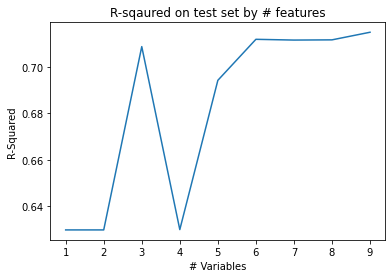

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in R_test_dict.keys()], 
         [float(value) for value in R_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on test set by # features');

highest at 3 features

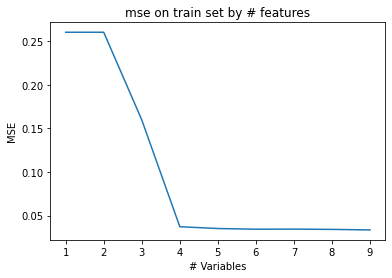

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_train_dict.keys()], 
         [float(value) for value in mse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on train set by # features');

levels off around 4 features

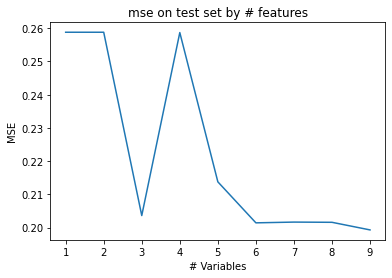

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_test_dict.keys()], 
         [float(value) for value in mse_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on test set by # features');

lowest around 3 features

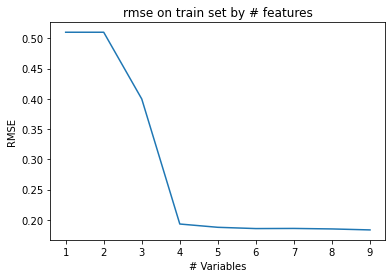

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_train_dict.keys()], 
         [float(value) for value in rmse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on train set by # features');

levels off around 4 features

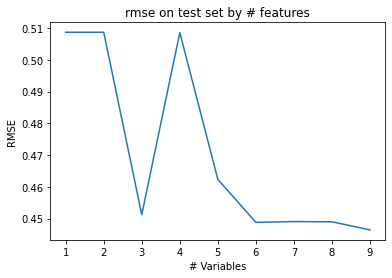

In [ ]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_test_dict.keys()], 
         [float(value) for value in rmse_test_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on test set by # features');

lowest around 3 features

**verdict: use 3 features**

In [ ]:
include[0:3]

['LBXPFUA', 'LBDPFUAL', 'LBXPFNA']

In [ ]:
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred = reg2.predict(X_test[include[0:3]])

In [ ]:
#for later use
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred_forest = reg2.predict(X_test[include[0:3]])
y_pred_series_forest=pd.Series(y_pred_forest,index=X_test.index)

In [ ]:
pred_train = reg2.predict(X_train[include[0:3]])
#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg2.predict(X_test[include[0:3]])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.7689365877299063
R squared test set 0.7087435736429151
MSE training set 0.15982510547736156
MSE test set 0.20362397125503515
RMSE training set 0.3997813220716565
RMSE test set 0.45124712880530904


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1594,-2.659260,-2.512333
1598,-2.659260,-2.362927
717,-2.659260,-2.480458
543,-2.659260,-2.362927
948,-2.659260,-2.362927
...,...,...
746,0.741937,0.681711
564,0.875469,0.269157
941,0.916291,0.289441
1074,1.098612,-1.462399


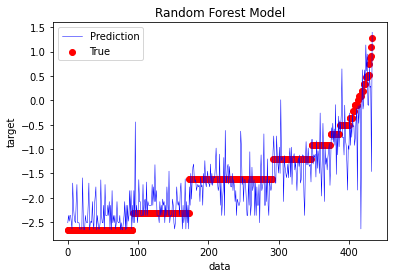

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

# Ordinary Least Squares Regression

In [ ]:
X=df_PFAS.drop(columns=['LBDPFDEL','LBXPFDE'])
Y=df_PFAS['LBXPFDE']

In [ ]:
#X = sm.add_constant(X)
reg = sm.OLS(Y, sm.add_constant(X)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                LBXPFDE   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     359.4
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:24:58   Log-Likelihood:                -1319.6
No. Observations:                2168   AIC:                             2671.
Df Residuals:                    2152   BIC:                             2762.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2520      0.611      0.412      0.6

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [ ]:
print("Parameters: ", reg.params)
print("R2: ", reg.rsquared)

Parameters:  const       0.252020
SEQN       -0.000003
LBXPFHS    -0.018005
LBDPFHSL    0.248467
LBXMPAH     0.020752
LBDMPAHL   -0.020309
LBXPFBS    -0.179395
LBDPFBSL   -0.307330
LBXPFHP     0.092389
LBDPFHPL    0.029183
LBXPFNA     0.496732
LBDPFNAL    0.416246
LBXPFUA     0.490411
LBDPFUAL   -0.127984
LBXPFDO     0.156096
LBDPFDOL    0.102342
dtype: float64
R2:  0.7146751416829822


In [ ]:
print("Standard errors: ", reg.bse)

Standard errors:  const       0.611152
SEQN        0.000003
LBXPFHS     0.012715
LBDPFHSL    0.126460
LBXMPAH     0.019162
LBDMPAHL    0.030002
LBXPFBS     0.273562
LBDPFBSL    0.232749
LBXPFHP     0.054067
LBDPFHPL    0.049246
LBXPFNA     0.021044
LBDPFNAL    0.123016
LBXPFUA     0.020494
LBDPFUAL    0.030393
LBXPFDO     0.045970
LBDPFDOL    0.050917
dtype: float64


In [ ]:
y_pred=reg.fittedvalues

In [ ]:

print(list(X.index)==list(Y.index))
y_pred_series=pd.Series(y_pred,index=X.index)
print(list(y_pred_series.index)==list(Y.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
2337,-2.659260,-2.447377
1426,-2.659260,-2.318711
1422,-2.659260,-2.405711
465,-2.659260,-1.615860
466,-2.659260,-1.839066
...,...,...
1261,1.568616,1.308258
801,1.589235,0.178851
2290,1.987874,0.286213
1666,2.694627,-2.174641


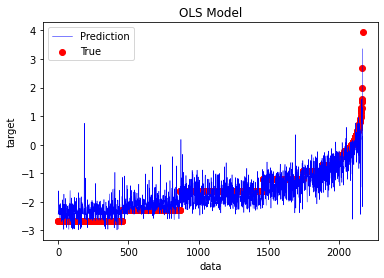

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

#Neural Network

[sklearn.neural_network.MLPRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install shap

In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import shap

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from collections import defaultdict

In [ ]:
labels=Y_train
data=X_train_scaled
dev_labels=Y_train
dev_data=X_test_scaled

<BarContainer object of 36 artists>

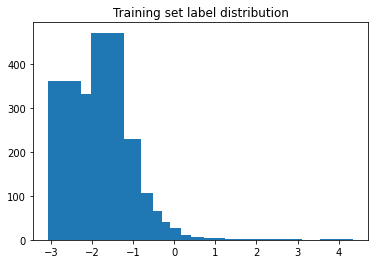

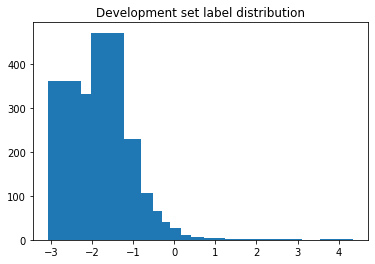

In [ ]:
counts = defaultdict(int)
for label in labels:
 counts[label] += 1

plt.figure()
plt.title("Training set label distribution")
k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))
dev_counts = defaultdict(int)
for label in dev_labels:
 dev_counts[label] += 1
plt.figure()
plt.title("Development set label distribution")
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = MLPRegressor(random_state=0, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [ ]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.7842708046872333
R squared test set 0.7227064863533514
MSE training set 347195683.35665107
MSE test set 0.19386218240131664
RMSE training set 18633.18768640114
RMSE test set 0.4402978337458823


X has feature names, but MLPRegressor was fitted without feature names
X has feature names, but MLPRegressor was fitted without feature names


In [ ]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
1594,-2.659260,-2.352764
1598,-2.659260,-2.175780
717,-2.659260,-2.242068
543,-2.659260,-2.223975
948,-2.659260,-2.306428
...,...,...
746,0.741937,0.522168
564,0.875469,-0.190582
941,0.916291,-0.234572
1074,1.098612,-1.332879


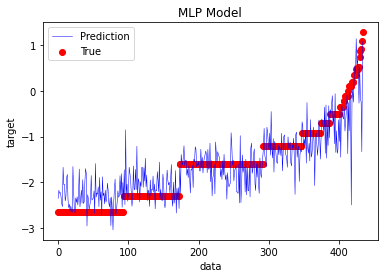

In [ ]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.plot(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",linewidth=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

# All plots

In [ ]:
test_DF= pd.DataFrame(columns = ['Actual', 'Lasso','Decision Tree','Random Forest','OLS','Neural Network'])

#lasso
reg = Lasso(alpha=0.008585019798920172)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)
y_pred_series=pd.Series(y_pred,index=X_test.index)